# Introduction to Pandas

In this notebook we will go over some basics of the python module ```pandas``` using Python 3.5 (and above). 


### But first, a quick introduction to Jupyter

The software that we'll be using for exercise sessions (and that you are using right now) is ``Jupyter``. [Jupyter](https://jupyter.org/) provides browser-based "notebooks", that interface a Python core running on your machine. Each notebook is composed of _cells_ of either Markdown (structured text like the one you are reading right now) or Python code that you can modify and run. When you _run_ a cell (either Cell > Run Cells, or the Run button, or Ctrl+Enter), the code it contains is executed _in the same environment as all previously executed cells_. Hence, every variable (or module, or function) that you define in a cell can be reused in any later cell. You will see that this will be very convenient for exercise sessions!

## The toy dataset

We will use the dataset available [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality).
Read the information here to understand what the dataset is all about. 

The dataset contains information about the perceived quality of a particular brand of Portuguese wine.  

Each row will represent a particular red wine variant and each column will contain the following:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality (score between 0 and 10)

We will use the data to learn more about working with ```pandas```.


## Downloading the data:

Visit [this link](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv) and save the CSV (Comma Separated Values) file to the **same folder** where you have saved **this notebook** without altering the suggested name. Go ahead and open it with a **text editor**, to get an idea of what it looks like. You should have something like this:

![title](csv_head.png)

Let's load this dataset into `Pandas`.

**Exercise 1**: use Pandas' `read_csv` method to open the dataset as a `pandas.DataFrame` named `redwine`. Use the `.head` method to confirm that you loaded it correctly.

In [1]:
# Loading the pandas module with the name 'pd' 
import pandas as pd 

In [2]:
# YOUR CODE HERE
redwine = pd.read_csv('winequality-red.csv', sep=';')  # read the csv file

In [3]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### What does Pandas do?

The function `read_csv` returns a ```pandas.DataFrame``` object (in our example, ```redwine``` ). This is Pandas' representation of a dataset, and we will use this type extensively in the course. Pandas DataFrame are very powerful objects, that allow for a lot of high-level operations for manipulating the data. In this tutorial, we will cover some of the basic operations that you will need for the CO408 course.

A `pandas.DataFrame` represents data as a table with *columns* and *rows*. Each row represents a record of the data (a person, an interaction, a wine, ...), and each column represents an attribute of this record. Columns are represented by a _unique name_ and have a specific type (integer, float, string, tuple, etc.).


The `.info` method of a `pandas.DataFrame` gives detailed information about the columns of a dataset. Let's investigate the `redwine` dataset:

In [4]:
redwine.info()  # This prints out some basic stats about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


From this summary we can see the names of our columns, the number of non-empty rows, and the type of each column. In our case they are all floating point numbers (```float64```) except the last one, the quality, which is an integer. We can also use the `.columns` attribute to obtain a list of the columns:

In [5]:
redwine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

We can access each column individually, using brackets and the column name:

In [6]:
redwine['alcohol']

0        9.4
1        9.8
2        9.8
3        9.8
4        9.4
        ... 
1594    10.5
1595    11.2
1596    11.0
1597    10.2
1598    11.0
Name: alcohol, Length: 1599, dtype: float64

The records (rows) of the dataset are ordered. Every function that manipulates columns or the dataset will always return values in the same order. Furthermore, each record is uniquely identified by an _index_. This index allows to manipulate records individually, and to refer to specific records. This index is either:
1. A column in the dataset (a name, an ID, ...)
2. An additional column of numbers ranging from 0 to the size of the dataset -1 [by default].

When displaying the dataset, the index is always displayed as the leftmost columns. Let's investigate what it is in our case:

In [7]:
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Indeed, as no index was provided when creating the dataframe, `Pandas` resorted to the default integer range. We will see later how to change this index column in **Modifying the dataset**.

**Exercise 2:** Use this integer index to access one specific record (say, the _third_ record) in the dataset, with the `.loc` attribute of a `pandas.DataFrame` (_is it a function?_):

In [8]:
# YOUR CODE HERE
redwine.loc[3] # notice the brackets: this is NOT a function call (think of it like a dictionary)

fixed acidity           11.200
volatile acidity         0.280
citric acid              0.560
residual sugar           1.900
chlorides                0.075
free sulfur dioxide     17.000
total sulfur dioxide    60.000
density                  0.998
pH                       3.160
sulphates                0.580
alcohol                  9.800
quality                  6.000
Name: 3, dtype: float64

An operation that is often useful to **aggregate** the data using functions (either custom or predefined), such as the mean or the standard deviation. 

**Exercise 3:** Use the `.agg` method to compute the mean and standard deviation of each column of a dataset. _What does this function return?_

In [9]:
# YOUR CODE HERE
redwine.agg(['mean', 'std'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569


You should find that the mean fixed acidity is about 8.3196, with a std of 1.74. Is it what you observe?

## Modifying the dataset

It can be very useful to modify datasets. `Pandas` has a lot of functions you can use to append columns, modify them _en masse_, and so on. Here, we will only use a few of them, to illustrate some of the capabilities of the framework.

But first, let's go back to the "**index**" column (which uniquely identifies each row). Let's see what it is for the redwine dataset:

In [10]:
redwine.index

RangeIndex(start=0, stop=1599, step=1)

As no column was specified as the index when loading the dataset, Pandas resorted to the default (an integer ranging from 0 to the number of records). It is possible to define another column to be the index. For this, let's first add a column corresponding to the (fake) names of our wines. We will generate names by taking words composed of 3 letters, so that each element in the index column is unique. 

The code below generate a list of potential names (in this case, triplets of letters in alphabetical order).

In [11]:
# create wine names using combinations of letters, ordered
letters = 'abcdefghijkl'
names = []

# could also be done with the itertools module ;)
for a in letters:
    for b in letters:
        for c in letters:
            names.append(a+b+c)

**Exercise 4**: Add a `name` column to the dataset (using indexing notation), and set it as the index (since each name is unique, this works), using the `set_index` method.

_Hint: beware of the `inplace` argument. Why is it useful?_

In [12]:
## YOUR CODE HERE
redwine['name'] = names[:len(redwine)]
redwine.set_index('name', inplace=True)

In [13]:
redwine.head(5) # observe that `name` has a special place (where there used to be numbers)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
name,,,,,,,,,,,,
aaa,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
aab,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
aac,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
aad,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
aae,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The index, as it identifies uniquely every row, can be used to:
1. Retrieve one particular record, using `redwine.loc`, for instance to modify it.
2. Iterate over records using the index.

Let us start by accessing and modifying one record.

In [14]:
gig = redwine.loc['gig']  # this is a particularly groovy wine
# gig is now an individual record
gig

fixed acidity            9.00000
volatile acidity         0.38000
citric acid              0.41000
residual sugar           2.40000
chlorides                0.10300
free sulfur dioxide      6.00000
total sulfur dioxide    10.00000
density                  0.99604
pH                       3.13000
sulphates                0.58000
alcohol                 11.90000
quality                  7.00000
Name: gig, dtype: float64

In [15]:
# you can access individual attributes
gig.quality

7.0

**Exercise 5.1**: Let's assume that the quality of wine `gig` was mistakenly encoded, and should be 5 instead. Modify the `quality` of this record in the database.

_Hint: what happens if you modify `gig` directly?_

In [16]:
# YOUR CODE HERE
gig.quality = 5 # raises a warning
redwine.loc['gig'] = gig

/home/ana-maria/.local/lib/python3.6/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


As stated earlier, you can use the index to iterate over a dataframe.

**Exercise 5.2**: compute the average `pH` of all wines whose name contains the letter "f", by iterating over all records.

In [17]:
## YOUR CODE HERE
allpH = 0
count = 0
for idx in redwine.index:
    record = redwine.loc[idx]
    if 'f' in record.name:
        allpH += record.pH
        count += 1
print(allpH/count)

3.325306666666668


Do you find 3.325?

We can _remove_ records from a dataframe using the `drop` function (which can also remove columns -- `Pandas` functions are usually very versatile).

**Exercise 6**: Use the `drop` function to remove `gig` from the database. 

In [18]:
redwine.drop('gig', inplace=True)

Sanity check: is the record still in the dataset?

In [19]:
redwine.loc['gig'] # this should raise a nasty error :'(

KeyError: 'gig'

## Visualising the data

Now, let's visualise the data in a more useful way. For this, we will use the `matplotlib` library. We first need to import it and add the `magic` modifier `%matplotlib inline` to make sure that graphs are displayed in this notebook.

In [20]:
import matplotlib.pyplot as plt
# this line is necessary to make figures appear nicely in the notebook
%matplotlib inline

**Exercise 7.1:** Draw a scatter plot of `pH` against `citric acid` to see if there is a relationship between the two.

_hint: you can access the values of a column (ordered by index) using `redwine[columnname]`._

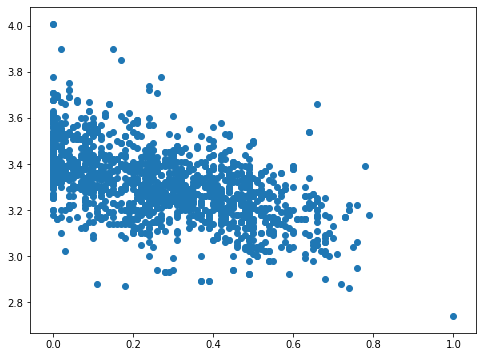

In [21]:
# YOUR CODE HERE
plt.figure(figsize=(8,6))
plt.scatter(redwine['citric acid'], redwine['pH'])
# redwine.plot.scatter(x='citric acid', y='pH', figsize=(10, 8))

Intuitively, the ```pH``` level decreases as the concentration of ```citric acid``` increases. 

**Exercise 7.2**: What about wine ```density``` against ```alcohol``` level? What is your intuition? Confirm it using another scatter plot.

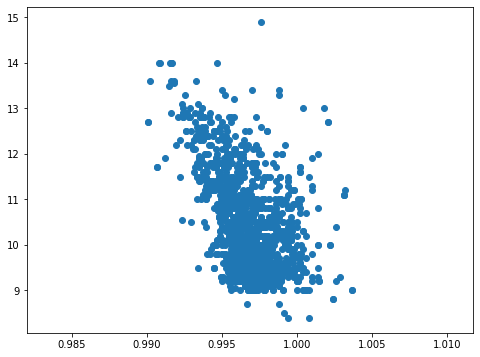

In [22]:
# YOUR CODE HERE
plt.figure(figsize=(8,6))
plt.scatter(redwine['density'], redwine['alcohol']);
# redwine.plot.scatter(x='citric acid', y='pH', figsize=(10, 8))

It seems that there is some correlation here as the alcohol level goes up.

What if we wanted to see this effect but only for wines that are bad?

First we will have to find out what is bad wine. We will define it as wines that have a lower than average quality score.  

Therefore we must first find the mean value of the ```quality``` column.

In [23]:
redwine['quality']

name
aaa    5.0
aab    5.0
aac    5.0
aad    6.0
aae    5.0
      ... 
lak    5.0
lal    6.0
lba    6.0
lbb    5.0
lbc    6.0
Name: quality, Length: 1598, dtype: float64

Pandas columns are ```pandas.Series``` objects and have most of the functionality of ```numpy arrays```. This means we can use mean, median and sum calculations.

**Exercise 8:** Compute the mean quality of wines in the dataset.

In [24]:
## YOUR CODE HERE
ave_quality = redwine['quality'].mean()

In [25]:
print(ave_quality)

5.635168961201502


Do you find 5.635?

Now that we know the mean, how do we select only those rows that have a quality value less than ```ave_quality```?

We can _slice_ a ```pandas.DataFrame``` object by indexing it with conditional statements. 
This is because a conditional statement on on a dataframe returns a series of boolean values.
See the example below. 

In [26]:
# using a conditional statement on a pandas dataframe directly
redwine['quality'] < ave_quality

name
aaa     True
aab     True
aac     True
aad    False
aae     True
       ...  
lak     True
lal    False
lba    False
lbb     True
lbc    False
Name: quality, Length: 1598, dtype: bool

We can now pass this series of boolean values directly to a dataframe as we would a column. 
i.e. ```redwine[redwine['quality'] < ave_quality]``` returns only those rows in ```redwine``` where the value of the ```'quality'``` column is less than the value of ```ave_quality```. 

In [27]:
# new dataframe with only the data about the dead
badwine = redwine[redwine['quality'] < ave_quality]

In [28]:
# Some summary statistics
badwine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 744 entries, aaa to lbb
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         744 non-null    float64
 1   volatile acidity      744 non-null    float64
 2   citric acid           744 non-null    float64
 3   residual sugar        744 non-null    float64
 4   chlorides             744 non-null    float64
 5   free sulfur dioxide   744 non-null    float64
 6   total sulfur dioxide  744 non-null    float64
 7   density               744 non-null    float64
 8   pH                    744 non-null    float64
 9   sulphates             744 non-null    float64
 10  alcohol               744 non-null    float64
 11  quality               744 non-null    float64
dtypes: float64(12)
memory usage: 75.6+ KB


In [29]:
# print the first 5 rows
badwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
name,,,,,,,,,,,,
aaa,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
aab,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
aac,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
aae,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
aaf,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0


Let's now explore how the relationships we studied before change for bad wine.

**Exercise 9:** Plot the alcohol level versus density for both `redwine` and `badwine` on the same figure. Also, add some labels on the axis and a legend to have a nice plot to show your friends.

_Hint: use the alpha parameter to make points transparent._

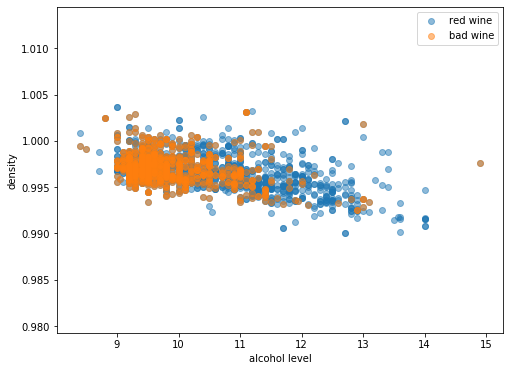

In [30]:
## YOUR CODE HERE
plt.figure(figsize=(8,6))
plt.scatter(redwine['alcohol'], redwine['density'], alpha=.5, label='red wine')
plt.scatter(badwine['alcohol'], badwine['density'], alpha=.5, label='bad wine')
plt.legend()
plt.xlabel('alcohol level')
plt.ylabel('density');
#my_canvas = redwine.plot.scatter(x='alcohol', y='density', figsize=(10, 8))
#badwine.plot.scatter(x='alcohol', y='density', figsize=(10, 8), ax=my_canvas, color='red')

Much more interesting. 

Not only do we find that ```density``` is related to ```alcohol``` but also that the bad wines tend to overall have a lower ```alcohol``` level. 

Perhaps ```alcohol``` is very important in wine quality. In order to check this, let's study what the alcohol level is in our dataset.

**Exercise 10.1:** Plot a histogram of alcohol level of all wines.

(array([ 37., 515., 323., 257., 232., 118.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <a list of 10 Patch objects>)

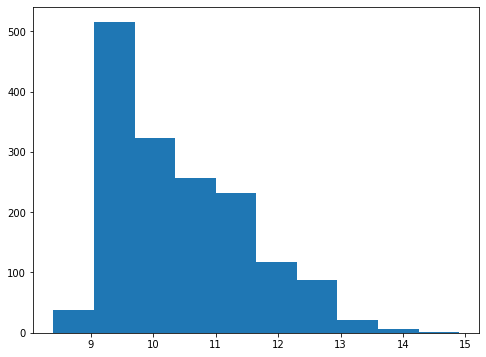

In [31]:
## YOUR CODE HERE
plt.figure(figsize=(8,6))
plt.hist(redwine['alcohol'])
#redwine['alcohol'].plot.hist(figsize=(10, 8))

On the y axis we see the frequency of ```alcohol``` levels specified on the x axis. 

**Exercise 10.2**: Plot two histograms of alcohol level, one for all wines and the other for bad wines.

_Hint: think of normalising your histograms to make them comparable._

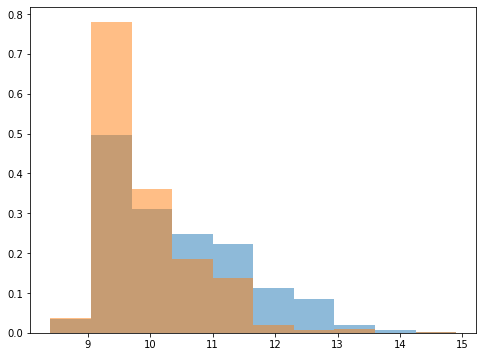

In [32]:
# YOUR CODE HERE
plt.figure(figsize=(8,6))
plt.hist(redwine['alcohol'], density=True, alpha=.5)
plt.hist(badwine['alcohol'], density=True, alpha=.5);

We can now see very clearly that the _bad wine_ clearly has a lower ```alcohol``` content as the red histogram (corresponding to bad wines) is tighter around lower ```alcohol``` values! 

## The `groupby` function

A function that we will use extensively in the course is the `groupby` function. It is a (very) versatile function to "divide" the dataset in several subdatasets. This method takes as argument (among many other possibilities) one or several columns, and returns a series of `pandas` dataframes whose records all share the same values for the specific columns. Let's first create a `good` column, that is True if the wine is good, according to our previous criterion.

In [33]:
redwine['good'] = redwine['quality'] > ave_quality

In [34]:
redwine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
name,,,,,,,,,,,,,
aaa,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,False
aab,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,False
aac,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,False
aad,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,True
aae,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,False


**Exercise 11.1:** group the wine according to whether it is good or bad, using the `groupby` function, and display both datasets. What does groupby return?

In [35]:
## Your code here
c1, c2 = redwine.groupby('good')

In [36]:
print('column value:', c1[0])
c1[1].head()

column value: False


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
name,,,,,,,,,,,,,
aaa,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,False
aab,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,False
aac,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,False
aae,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,False
aaf,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0,False


In [37]:
print('column value:', c2[0])
c2[1].head()

column value: True


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
name,,,,,,,,,,,,,
aad,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,True
aah,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0,True
aai,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0,True
abe,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.9969,3.30,0.75,10.5,7.0,True
abh,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2,6.0,True


`groupby` is a very powerful tool, that can be used to do much more. The attribute that it is being passed can be many different things:
1. A single column, as we did before, which groups by value of the column.
2. A list of columns, in which case the results are grouped by tuples of values of the columns (for instance, `(1,1)`, `(1,2)`, `(2,1)` and `(2,2)`).
3. A function (or list of functions) of _the index_, which then groups by lists of values returned by the function.

**Exercice 11.2**: Create a `strong` column in the dataset, which is True for wines that are stronger than average and False otherwise, then use `groupby` to group by `good` and `strong`. Count and display the number of wines in each group.

In [38]:
redwine['strong'] = redwine['alcohol'] > redwine['alcohol'].mean()
groups = redwine.groupby(['strong', 'good'])
for v, rec in groups:
    print('strong' if v[0] else 'light', 'good' if v[1] else 'bad','\t', len(rec))

light bad 	 584
light good 	 332
strong bad 	 160
strong good 	 522


_Hint: you should obtain the following results:_

| Wine type | Count |
| :- | :--:|
| light bad | 584 |        
| light good | 332 |
| strong bad | 160 |
| strong good | 522 |

_A bit more sophisticated._ 
A useful operation is to aggregate the data after a `groupby` (for instance, to obtain the mean of a column when restricted to some set of attributes). This can be done using the (same) `.agg` function to aggregate the data in some statistics.

In [39]:
redwine.groupby(['pH', 'good']).agg(['mean', 'std'])

fixed acidity           volatile acidity           citric acid  \
                    mean       std             mean       std        mean   
pH   good                                                                   
2.74 False           9.2       NaN           0.5200       NaN       1.000   
2.86 True           14.3       NaN           0.3100       NaN       0.740   
2.87 True            9.2       NaN           0.7550       NaN       0.180   
2.88 False          10.0       NaN           0.6900       NaN       0.110   
     True           12.6       NaN           0.3100       NaN       0.720   
...                  ...       ...              ...       ...         ...   
3.78 True            5.3  0.141421           0.5325  0.159099       0.135   
3.85 True            4.7       NaN           0.6000       NaN       0.170   
3.90 False           4.6       NaN           0.5200       NaN       0.150   
     True            5.1       NaN           0.4700       NaN       0.020   
4.01 True            5.2  0.282843           0.7400  0.000000       0.000   

                     residual sugar           chlorides            ...  \
                 std           mean       std      mean       std  ...   
pH   good                                                          ...   
2.74 False       NaN          3.400       NaN     0.610       NaN  ...   
2.86 True        NaN          1.800       NaN     0.075       NaN  ...   
2.87 True        NaN          2.200       NaN     0.148       NaN  ...   
2.88 False       NaN          1.400       NaN     0.084       NaN  ...   
     True        NaN          2.200       NaN     0.072       NaN  ...   
...              ...            ...       ...       ...       ...  ...   
3.78 True   0.190919          2.075  0.106066     0.086  0.008485  ...   
3.85 True        NaN          2.300       NaN     0.058       NaN  ...   
3.90 False       NaN          2.100       NaN     0.054       NaN  ...   
     True        NaN          1.300       NaN     0.034       NaN  ...   
4.01 True   0.000000          1.200  0.000000     0.041  0.000000  ...   

             density           sulphates           alcohol           quality  \
                mean       std      mean       std    mean       std    mean   
pH   good                                                                      
2.74 False  0.999600       NaN     2.000       NaN     9.4       NaN     4.0   
2.86 True   1.000800       NaN     0.790       NaN     8.4       NaN     6.0   
2.87 True   0.996900       NaN     1.360       NaN    10.2       NaN     6.0   
2.88 False  0.995780       NaN     0.470       NaN     9.7       NaN     5.0   
     True   0.998700       NaN     0.820       NaN     9.8       NaN     8.0   
...              ...       ...       ...       ...     ...       ...     ...   
3.78 True   0.994575  0.000191     0.625  0.021213    12.4  0.141421     6.5   
3.85 True   0.993200       NaN     0.600       NaN    12.9       NaN     6.0   
3.90 False  0.993400       NaN     0.560       NaN    13.1       NaN     4.0   
     True   0.992100       NaN     0.620       NaN    12.8       NaN     6.0   
4.01 True   0.992580  0.000000     0.590  0.000000    12.5  0.000000     6.0   

                     strong       
                 std   mean  std  
pH   good                         
2.74 False       NaN    0.0  NaN  
2.86 True        NaN    0.0  NaN  
2.87 True        NaN    0.0  NaN  
2.88 False       NaN    0.0  NaN  
     True        NaN    0.0  NaN  
...              ...    ...  ...  
3.78 True   0.707107    1.0  0.0  
3.85 True        NaN    1.0  NaN  
3.90 False       NaN    1.0  NaN  
     True        NaN    1.0  NaN  
4.01 True   0.000000    1.0  0.0  

[164 rows x 24 columns]

The structure of this `DataFrame` is weird: the index is composed of a pair `(pH, good)`, which in practice is not very useful. For this, one can `reset` the index, to go back to the default behaviour. Thus, the final line looks like this:

In [40]:
redwine.groupby(['pH', 'good']).agg(['mean', 'std']).reset_index()

pH   good fixed acidity           volatile acidity            \
                          mean       std             mean       std   
0    2.74  False           9.2       NaN           0.5200       NaN   
1    2.86   True          14.3       NaN           0.3100       NaN   
2    2.87   True           9.2       NaN           0.7550       NaN   
3    2.88  False          10.0       NaN           0.6900       NaN   
4    2.88   True          12.6       NaN           0.3100       NaN   
..    ...    ...           ...       ...              ...       ...   
159  3.78   True           5.3  0.141421           0.5325  0.159099   
160  3.85   True           4.7       NaN           0.6000       NaN   
161  3.90  False           4.6       NaN           0.5200       NaN   
162  3.90   True           5.1       NaN           0.4700       NaN   
163  4.01   True           5.2  0.282843           0.7400  0.000000   

    citric acid           residual sugar            ...   density            \
           mean       std           mean       std  ...      mean       std   
0         1.000       NaN          3.400       NaN  ...  0.999600       NaN   
1         0.740       NaN          1.800       NaN  ...  1.000800       NaN   
2         0.180       NaN          2.200       NaN  ...  0.996900       NaN   
3         0.110       NaN          1.400       NaN  ...  0.995780       NaN   
4         0.720       NaN          2.200       NaN  ...  0.998700       NaN   
..          ...       ...            ...       ...  ...       ...       ...   
159       0.135  0.190919          2.075  0.106066  ...  0.994575  0.000191   
160       0.170       NaN          2.300       NaN  ...  0.993200       NaN   
161       0.150       NaN          2.100       NaN  ...  0.993400       NaN   
162       0.020       NaN          1.300       NaN  ...  0.992100       NaN   
163       0.000  0.000000          1.200  0.000000  ...  0.992580  0.000000   

    sulphates           alcohol           quality           strong       
         mean       std    mean       std    mean       std   mean  std  
0       2.000       NaN     9.4       NaN     4.0       NaN    0.0  NaN  
1       0.790       NaN     8.4       NaN     6.0       NaN    0.0  NaN  
2       1.360       NaN    10.2       NaN     6.0       NaN    0.0  NaN  
3       0.470       NaN     9.7       NaN     5.0       NaN    0.0  NaN  
4       0.820       NaN     9.8       NaN     8.0       NaN    0.0  NaN  
..        ...       ...     ...       ...     ...       ...    ...  ...  
159     0.625  0.021213    12.4  0.141421     6.5  0.707107    1.0  0.0  
160     0.600       NaN    12.9       NaN     6.0       NaN    1.0  NaN  
161     0.560       NaN    13.1       NaN     4.0       NaN    1.0  NaN  
162     0.620       NaN    12.8       NaN     6.0       NaN    1.0  NaN  
163     0.590  0.000000    12.5  0.000000     6.0  0.000000    1.0  0.0  

[164 rows x 26 columns]

## The `concat` function

Another important function is the `concat` function, which can be used for concatenating different DataFrame object along a given axis.

**Exercise 12.1:** Sample 100 good wines and 100 bad wines. 

_Hint 1:_ Use the `good` column defined in the previous section.

_Hint 2:_ Use the `sample` function.

In [41]:
sampled_good = redwine[redwine['good'] == True].sample(n=100)
sampled_bad = redwine[redwine['good'] == False].sample(n=100)

print(len(sampled_good), len(sampled_bad))

100 100


**Exercise 12.2:** Concatenate the two DataFrame objects by setting the value of the _axis_ argument accordingly. Check that the size of the resulting DataFrame is 200.

In [42]:
sampled = pd.concat([sampled_good, sampled_bad], axis=0)
len(sampled) == 200

True